In [26]:
#http://adataanalyst.com/scikit-learn/countvectorizer-sklearn-example/
#http://scikit-learn.org/stable/modules/feature_extraction.html

In [1]:
#https://towardsdatascience.com/hacking-scikit-learns-vectorizers-9ef26a7170af
import pandas as pd
corpora = [
    'The quick brown fox&#x0002E;',
    'dog jumped over the lazy dog&#x00021;'
]
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
wm = cvec.fit_transform(corpora)
tokens = cvec.get_feature_names()
df = pd.DataFrame(data=wm.toarray(), index=['Doc1', 'Doc2'],
             columns=tokens)

In [36]:
print(type(wm))

<class 'scipy.sparse.csr.csr_matrix'>


In [40]:
import scipy
str(scipy.sparse.csr_matrix(df.values)[:2])

'  (0, 0)\t1\n  (0, 2)\t1\n  (0, 6)\t1\n  (0, 7)\t1\n  (0, 9)\t1\n  (1, 1)\t2\n  (1, 3)\t1\n  (1, 4)\t1\n  (1, 5)\t1\n  (1, 7)\t1\n  (1, 8)\t1'

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
file = '../98_sample/deviceid_packages.tsv'


In [9]:
messages = [line.rstrip() for line in open(file)]
print (len(messages))
for num,message in enumerate(messages[:40]):
    print(num,message)
    print ('\n')


1000
0 00009270c4ec26e1d76f5d86847009c9	1896072db9ce6406febfc17f681c2086,90cb852cf345e04d508fe03f74089183,8c8544b6c129ad4a431be753143ed1c3


1 000189ef5d5b951841d416a8c6c5b995	1896072db9ce6406febfc17f681c2086,97d0422a3317b1929926dc90cda4fc53,5e8709466b22da6b45bfd30825bd3620,bc7ae002af8b8ff753c21093ecaeb6d5,f29fe6997c2e42764ed7e7737fa870da,8d2448133beb3422f0f638bacf8f7051,0b0816ff97e9a3e5501ed2dcb4a0d66e,e4fb97b00004709730e13c588d457350,e29eb7083bdf54af48352ffa979fc830,2d5abf599e2178d1774a425f7f0d1784,37de3dfb9d3bc0a2264adf8802fef726,9e9ff523f0448879c6cd521495fd758d,3570fa5e14faf9b3126b9deea90c21d5,b9e923e77dfb832d49c13a7b39e517f5,9fabbe1b8c48de63be0de5cf72d99ce3,8c8544b6c129ad4a431be753143ed1c3,039be717f253f7b10ed1ce405de08b9f,6e32d9a42976b263347a17c6c2c91c18,5b687f58feae9c48bc4b848b6279b048


2 00026d79a6f0955fc860947724e24765	c33b35d6254ad9c0c238233eb97a6c60


3 0002e3afb8146bc08e40575e45f0eca6	1896072db9ce6406febfc17f681c2086,07e967d75aab2f6a52c558695a572a7c,97d0422a3317b1929926dc90

In [10]:

import pandas
messages = pandas.read_csv(file,
                           sep='\t',names=['labels','message'])


messages.describe()

messages.info()

messages.groupby('labels').describe()

messages['length'] = messages['message'].apply(len)
messages.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
labels     1000 non-null object
message    1000 non-null object
dtypes: object(2)
memory usage: 15.7+ KB


,labels,message,length
0,00009270c4ec26e1d76f5d86847009c9,"1896072db9ce6406febfc17f681c2086,90cb852cf345e...",98
1,000189ef5d5b951841d416a8c6c5b995,"1896072db9ce6406febfc17f681c2086,97d0422a3317b...",626
2,00026d79a6f0955fc860947724e24765,c33b35d6254ad9c0c238233eb97a6c60,32
3,0002e3afb8146bc08e40575e45f0eca6,"1896072db9ce6406febfc17f681c2086,07e967d75aab2...",98
4,0004709a296f9b925ae283efe2f043e7,"4538778ad75aa8ce61c9d13fb9cb661b,86f9f299cdbc8...",527


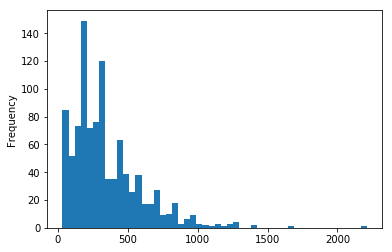

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
messages['length'].plot(bins=50,kind = 'hist')

In [17]:
apps = messages['message'].tolist()
len(apps)

1000

In [19]:
vectorizer = CountVectorizer()
apps_vect = vectorizer.fit_transform(apps)

In [24]:
vectorizer.get_feature_names()

['00749cce41b8cce5d66357b83096458a',
 '008b7b5a28b693eff2ee3a0312396ade',
 '008fe9637b1411ca485de82f3b35b6d8',
 '009da6e7b6133db1357b2d0bb4336cae',
 '00a68a879a98fdfc7fb0eb7e92466bff',
 '00bcb9d77bdc6dd791b94b9020ebf329',
 '00bcf54d44c5e8b88dfc76bf6434f42c',
 '00c3fa5b8e7746f01a21b2739a567bb1',
 '00c9da6b5229b0ae6893d77474328518',
 '00cd10ea7e8cd8f3bb31e85840f4a493',
 '00f478f042064f77291ac9f1f845340e',
 '01458b885c233964cd7c2b7c6d827788',
 '019067182350897b3924929b2fad8080',
 '01e8e4ea4a8c4bf5044216677fe8ddc1',
 '021e04063e3c223256e86c4330ab06d1',
 '021efa51d133af28d7de8ad91425c547',
 '0237598ed2b075af959088c140f43659',
 '0243628145cc1a2e259d40260ca0756b',
 '026de57ea56fc8cced7a36c85ec46070',
 '0274c7b63732c5a7556193436e12178f',
 '02a7ac215753a1fbbbb7e173e6a0be4b',
 '02bce1b62f5f5626621faa3cf7425529',
 '031afb27ec474bfed1205ed1f0e75ee9',
 '033381145b6b70299734c542238652f8',
 '03813350c91e83a19e7bc85e418ffb59',
 '0387b3b64d6c9617fa34650249881a70',
 '039be717f253f7b10ed1ce405de08b9f',
 